In [1]:
# Import the libraries
import numpy as np

In [2]:
# Bond
B1 = np.array([11, 11, 11]) # Payoff
# Stock
S1 = np.array([20, 10, 5]) # Payoff

In [3]:
# Payoffs at time T = 1
M1 = np.array([B1, S1]).T
M1

array([[11, 20],
       [11, 10],
       [11,  5]])

In [4]:
# Verify that this is an incomplete market
r = np.linalg.matrix_rank(M1)
rows, cols = M1.shape

In [5]:
if r == rows:
    print('The market is complete')
else:
    print('The market is incomplete')

The market is incomplete


In [6]:
# Create the random generator with NumPy
from numpy.random import default_rng

# Set the seed
rng = default_rng(100)

In [7]:
# Generate the portfolio payoffs
n = 1000

b = rng.uniform(low=-2, high=2, size=n)
a = rng.uniform(low=-2, high=2, size=n)

In [8]:
# Create a list of payoffs (of portfolios)
payoffs = []

for i in range(n):
    payoffs.append(b[i] * B1 + a[i] * S1)

payoffs = np.array(payoffs)
payoffs

array([[ 17.44928301,  16.09423738,  15.41671456],
       [ 43.43184736,  23.84011227,  14.04424473],
       [-15.40243263, -12.346225  , -10.81812118],
       ...,
       [  8.78823461,  11.65240771,  13.08449426],
       [-39.31237027, -30.02316308, -25.37855948],
       [  4.74643848,  -5.09162028, -10.01064966]])

In [9]:
# Scatter plot in the 3D space
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

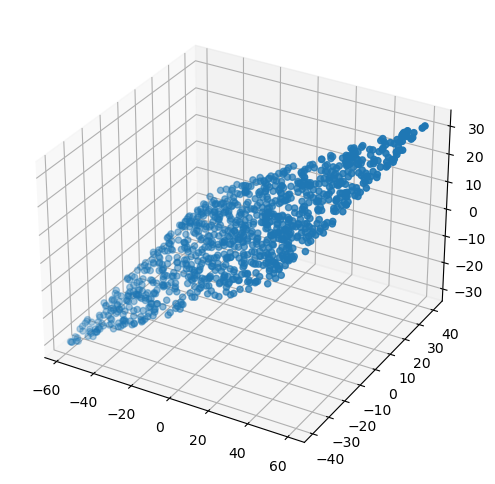

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(payoffs[:, 0], payoffs[:, 1], payoffs[:, 2])

In [11]:
# Payoff of the call
K = 10
C1 = np.maximum(S1 - K, 0)

In [12]:
# Ordinary least-square regression
reg = np.linalg.lstsq(M1, C1, rcond=-1)
reg

(array([-0.45454545,  0.71428571]),
 array([7.14285714]),
 2,
 array([28.93835724,  7.11136277]))

In [13]:
theta_best = reg[0]
theta_best

array([-0.45454545,  0.71428571])

In [14]:
# Payoff of the best hedge portfolio 
D1 = theta_best[0] * B1 + theta_best[1] * S1
D1

array([ 9.28571429,  2.14285714, -1.42857143])

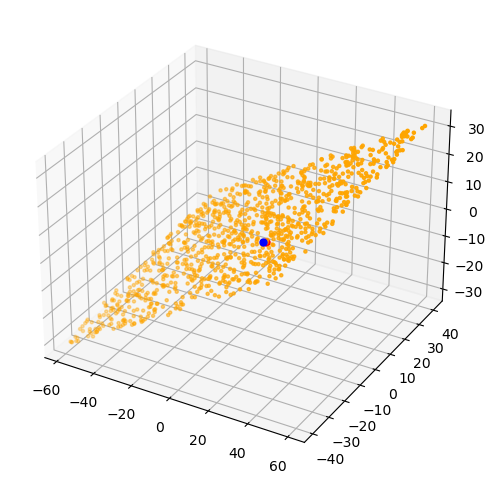

In [15]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(payoffs[:, 0], payoffs[:, 1], payoffs[:, 2], c='orange', marker='.')
ax.scatter(C1[0], C1[1], C1[2], c='blue', marker='.', s=100)
ax.scatter(D1[0], D1[1], D1[2], c='red', marker='.', s=100)